<a href="https://colab.research.google.com/github/020/020.github.io/blob/master/Beds_Occupancy_LSTM_TS_exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
keras = tf.keras

In [2]:
df = pd.read_csv('/content/beds_occupied.csv')
df

,date,occupied
0,11/05/2022 0:00,0.79
1,11/05/2022 1:00,0.79
2,11/05/2022 2:00,0.80
3,11/05/2022 3:00,0.80
4,11/05/2022 4:00,0.80
...,...,...
1995,02/08/2022 3:00,0.81
1996,02/08/2022 4:00,0.82
1997,02/08/2022 5:00,0.82
1998,02/08/2022 6:00,0.82


In [3]:
df.index = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
df[:26]

,date,occupied
date,,
2022-05-11 00:00:00,11/05/2022 0:00,0.79
2022-05-11 01:00:00,11/05/2022 1:00,0.79
2022-05-11 02:00:00,11/05/2022 2:00,0.80
2022-05-11 03:00:00,11/05/2022 3:00,0.80
2022-05-11 04:00:00,11/05/2022 4:00,0.80
2022-05-11 05:00:00,11/05/2022 5:00,0.80
2022-05-11 06:00:00,11/05/2022 6:00,0.81
2022-05-11 07:00:00,11/05/2022 7:00,0.81
2022-05-11 08:00:00,11/05/2022 8:00,0.81


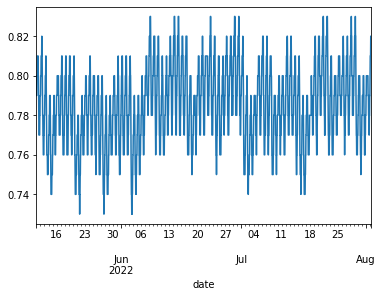

In [4]:
bed = df['occupied']
bed.plot()

In [5]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [6]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(bed, WINDOW_SIZE)
X1.shape, y1.shape

((1995, 5, 1), (1995,))

In [7]:
X_train1, y_train1 = X1[:1500], y1[:1500]
X_val1, y_val1 = X1[1500:1750], y1[1500:1750]
X_test1, y_test1 = X1[1750:], y1[1750:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((1500, 5, 1), (1500,), (250, 5, 1), (250,), (245, 5, 1), (245,))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [9]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [10]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=300, callbacks=[cp1])

Epoch 1/300
47/47 [==============================] - ETA: 0s - loss: 0.1631 - root_mean_squared_error: 0.4039

47/47 [==============================] - 8s 116ms/step - loss: 0.1631 - root_mean_squared_error: 0.4039 - val_loss: 7.2343e-04 - val_root_mean_squared_error: 0.0269
Epoch 2/300
42/47 [=========================>....] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0322

47/47 [==============================] - 5s 101ms/step - loss: 9.6091e-04 - root_mean_squared_error: 0.0310 - val_loss: 2.6011e-04 - val_root_mean_squared_error: 0.0161
Epoch 3/300
41/47 [=========================>....] - ETA: 0s - loss: 1.9563e-04 - root_mean_squared_error: 0.0140

47/47 [==============================] - 5s 103ms/step - loss: 1.9982e-04 - root_mean_squared_error: 0.0141 - val_loss: 2.0810e-04 - val_root_mean_squared_error: 0.0144
Epoch 4/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9639e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0916e-04 - val_root_mean_squared_error: 0.0145
Epoch 5/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9878e-04 - root_mean_squared_error: 0.0141 - val_loss: 2.1042e-04 - val_root_mean_squared_error: 0.0145
Epoch 6/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9584e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0855e-04 - val_root_mean_squared_error: 0.0144
Epoch 7/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9581e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.1071e-04 - val_root_mean_squared_error: 0.0145
Epoch 8/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9556e-04 - root_mean_squared_error: 0.01

47/47 [==============================] - 5s 101ms/step - loss: 1.9642e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0791e-04 - val_root_mean_squared_error: 0.0144
Epoch 10/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9884e-04 - root_mean_squared_error: 0.0141 - val_loss: 2.1843e-04 - val_root_mean_squared_error: 0.0148
Epoch 11/300
45/47 [===========================>..] - ETA: 0s - loss: 1.9835e-04 - root_mean_squared_error: 0.0141

47/47 [==============================] - 5s 107ms/step - loss: 1.9651e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0763e-04 - val_root_mean_squared_error: 0.0144
Epoch 12/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9502e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0822e-04 - val_root_mean_squared_error: 0.0144
Epoch 13/300
44/47 [===========================>..] - ETA: 0s - loss: 1.9627e-04 - root_mean_squared_error: 0.0140

47/47 [==============================] - 5s 99ms/step - loss: 1.9468e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0726e-04 - val_root_mean_squared_error: 0.0144
Epoch 14/300
47/47 [==============================] - 0s 5ms/step - loss: 1.9594e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0727e-04 - val_root_mean_squared_error: 0.0144
Epoch 15/300
45/47 [===========================>..] - ETA: 0s - loss: 1.9701e-04 - root_mean_squared_error: 0.0140

47/47 [==============================] - 5s 106ms/step - loss: 1.9625e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0705e-04 - val_root_mean_squared_error: 0.0144
Epoch 16/300
47/47 [==============================] - 0s 5ms/step - loss: 1.9967e-04 - root_mean_squared_error: 0.0141 - val_loss: 2.2116e-04 - val_root_mean_squared_error: 0.0149
Epoch 17/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9710e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0927e-04 - val_root_mean_squared_error: 0.0145
Epoch 18/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9711e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0750e-04 - val_root_mean_squared_error: 0.0144
Epoch 19/300
47/47 [==============================] - 0s 5ms/step - loss: 1.9624e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0766e-04 - val_root_mean_squared_error: 0.0144
Epoch 20/300
47/47 [==============================] - 0s 5ms/step - loss: 1.9538e-04 - root_mean_squared_error:

47/47 [==============================] - 6s 121ms/step - loss: 1.9849e-04 - root_mean_squared_error: 0.0141 - val_loss: 2.0667e-04 - val_root_mean_squared_error: 0.0144
Epoch 24/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9411e-04 - root_mean_squared_error: 0.0139 - val_loss: 2.0869e-04 - val_root_mean_squared_error: 0.0144
Epoch 25/300
38/47 [=======================>......] - ETA: 0s - loss: 1.9788e-04 - root_mean_squared_error: 0.0141

47/47 [==============================] - 5s 116ms/step - loss: 1.9710e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0551e-04 - val_root_mean_squared_error: 0.0143
Epoch 26/300
47/47 [==============================] - 0s 7ms/step - loss: 2.0137e-04 - root_mean_squared_error: 0.0142 - val_loss: 2.1132e-04 - val_root_mean_squared_error: 0.0145
Epoch 27/300
43/47 [==========================>...] - ETA: 0s - loss: 2.0239e-04 - root_mean_squared_error: 0.0142

47/47 [==============================] - 6s 119ms/step - loss: 2.0412e-04 - root_mean_squared_error: 0.0143 - val_loss: 2.0479e-04 - val_root_mean_squared_error: 0.0143
Epoch 28/300
47/47 [==============================] - 0s 6ms/step - loss: 2.0082e-04 - root_mean_squared_error: 0.0142 - val_loss: 2.0956e-04 - val_root_mean_squared_error: 0.0145
Epoch 29/300
47/47 [==============================] - 0s 6ms/step - loss: 2.0034e-04 - root_mean_squared_error: 0.0142 - val_loss: 2.1691e-04 - val_root_mean_squared_error: 0.0147
Epoch 30/300
46/47 [============================>.] - ETA: 0s - loss: 2.0481e-04 - root_mean_squared_error: 0.0143

47/47 [==============================] - 6s 130ms/step - loss: 2.0451e-04 - root_mean_squared_error: 0.0143 - val_loss: 2.0447e-04 - val_root_mean_squared_error: 0.0143
Epoch 31/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9648e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0677e-04 - val_root_mean_squared_error: 0.0144
Epoch 32/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9424e-04 - root_mean_squared_error: 0.0139 - val_loss: 2.0690e-04 - val_root_mean_squared_error: 0.0144
Epoch 33/300
40/47 [========================>.....] - ETA: 0s - loss: 1.9437e-04 - root_mean_squared_error: 0.0139

47/47 [==============================] - 5s 110ms/step - loss: 1.9289e-04 - root_mean_squared_error: 0.0139 - val_loss: 2.0297e-04 - val_root_mean_squared_error: 0.0142
Epoch 34/300
47/47 [==============================] - 0s 6ms/step - loss: 2.0230e-04 - root_mean_squared_error: 0.0142 - val_loss: 2.0682e-04 - val_root_mean_squared_error: 0.0144
Epoch 35/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9699e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.4271e-04 - val_root_mean_squared_error: 0.0156
Epoch 36/300
44/47 [===========================>..] - ETA: 0s - loss: 1.9764e-04 - root_mean_squared_error: 0.0141

47/47 [==============================] - 5s 108ms/step - loss: 1.9557e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0208e-04 - val_root_mean_squared_error: 0.0142
Epoch 37/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9239e-04 - root_mean_squared_error: 0.0139 - val_loss: 2.0274e-04 - val_root_mean_squared_error: 0.0142
Epoch 38/300
47/47 [==============================] - 0s 5ms/step - loss: 1.9448e-04 - root_mean_squared_error: 0.0139 - val_loss: 2.0776e-04 - val_root_mean_squared_error: 0.0144
Epoch 39/300
47/47 [==============================] - 0s 6ms/step - loss: 2.0186e-04 - root_mean_squared_error: 0.0142 - val_loss: 2.5568e-04 - val_root_mean_squared_error: 0.0160
Epoch 40/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9702e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0934e-04 - val_root_mean_squared_error: 0.0145
Epoch 41/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9085e-04 - root_mean_squared_error:

47/47 [==============================] - 4s 96ms/step - loss: 1.9097e-04 - root_mean_squared_error: 0.0138 - val_loss: 1.9929e-04 - val_root_mean_squared_error: 0.0141
Epoch 47/300
47/47 [==============================] - 0s 5ms/step - loss: 2.0329e-04 - root_mean_squared_error: 0.0143 - val_loss: 2.0968e-04 - val_root_mean_squared_error: 0.0145
Epoch 48/300
47/47 [==============================] - 0s 5ms/step - loss: 2.0172e-04 - root_mean_squared_error: 0.0142 - val_loss: 2.3271e-04 - val_root_mean_squared_error: 0.0153
Epoch 49/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9257e-04 - root_mean_squared_error: 0.0139 - val_loss: 2.0177e-04 - val_root_mean_squared_error: 0.0142
Epoch 50/300
47/47 [==============================] - ETA: 0s - loss: 1.8922e-04 - root_mean_squared_error: 0.0138

47/47 [==============================] - 5s 114ms/step - loss: 1.8922e-04 - root_mean_squared_error: 0.0138 - val_loss: 1.9714e-04 - val_root_mean_squared_error: 0.0140
Epoch 51/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9525e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0355e-04 - val_root_mean_squared_error: 0.0143
Epoch 52/300
47/47 [==============================] - 0s 7ms/step - loss: 1.8799e-04 - root_mean_squared_error: 0.0137 - val_loss: 2.0242e-04 - val_root_mean_squared_error: 0.0142
Epoch 53/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9530e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.1304e-04 - val_root_mean_squared_error: 0.0146
Epoch 54/300
46/47 [============================>.] - ETA: 0s - loss: 2.0422e-04 - root_mean_squared_error: 0.0143

47/47 [==============================] - 5s 108ms/step - loss: 2.0328e-04 - root_mean_squared_error: 0.0143 - val_loss: 1.9602e-04 - val_root_mean_squared_error: 0.0140
Epoch 55/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9679e-04 - root_mean_squared_error: 0.0140 - val_loss: 1.9995e-04 - val_root_mean_squared_error: 0.0141
Epoch 56/300
46/47 [============================>.] - ETA: 0s - loss: 1.8528e-04 - root_mean_squared_error: 0.0136

47/47 [==============================] - 4s 94ms/step - loss: 1.8724e-04 - root_mean_squared_error: 0.0137 - val_loss: 1.9566e-04 - val_root_mean_squared_error: 0.0140
Epoch 57/300
47/47 [==============================] - 0s 5ms/step - loss: 2.0569e-04 - root_mean_squared_error: 0.0143 - val_loss: 2.0685e-04 - val_root_mean_squared_error: 0.0144
Epoch 58/300
47/47 [==============================] - 0s 5ms/step - loss: 1.9685e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.0037e-04 - val_root_mean_squared_error: 0.0142
Epoch 59/300
43/47 [==========================>...] - ETA: 0s - loss: 1.8782e-04 - root_mean_squared_error: 0.0137

47/47 [==============================] - 5s 111ms/step - loss: 1.8886e-04 - root_mean_squared_error: 0.0137 - val_loss: 1.9368e-04 - val_root_mean_squared_error: 0.0139
Epoch 60/300
47/47 [==============================] - 0s 7ms/step - loss: 1.9117e-04 - root_mean_squared_error: 0.0138 - val_loss: 1.9421e-04 - val_root_mean_squared_error: 0.0139
Epoch 61/300
47/47 [==============================] - 0s 7ms/step - loss: 1.8913e-04 - root_mean_squared_error: 0.0138 - val_loss: 2.1853e-04 - val_root_mean_squared_error: 0.0148
Epoch 62/300
47/47 [==============================] - 0s 6ms/step - loss: 1.8923e-04 - root_mean_squared_error: 0.0138 - val_loss: 2.0026e-04 - val_root_mean_squared_error: 0.0142
Epoch 63/300
47/47 [==============================] - 0s 6ms/step - loss: 1.8218e-04 - root_mean_squared_error: 0.0135 - val_loss: 1.9463e-04 - val_root_mean_squared_error: 0.0140
Epoch 64/300
47/47 [==============================] - 0s 6ms/step - loss: 2.0326e-04 - root_mean_squared_error:

47/47 [==============================] - 5s 111ms/step - loss: 1.9331e-04 - root_mean_squared_error: 0.0139 - val_loss: 1.9194e-04 - val_root_mean_squared_error: 0.0139
Epoch 68/300
46/47 [============================>.] - ETA: 0s - loss: 2.0894e-04 - root_mean_squared_error: 0.0145

47/47 [==============================] - 5s 101ms/step - loss: 2.0731e-04 - root_mean_squared_error: 0.0144 - val_loss: 1.8990e-04 - val_root_mean_squared_error: 0.0138
Epoch 69/300
46/47 [============================>.] - ETA: 0s - loss: 1.8374e-04 - root_mean_squared_error: 0.0136

47/47 [==============================] - 5s 114ms/step - loss: 1.8344e-04 - root_mean_squared_error: 0.0135 - val_loss: 1.8798e-04 - val_root_mean_squared_error: 0.0137
Epoch 70/300
39/47 [=======================>......] - ETA: 0s - loss: 1.8914e-04 - root_mean_squared_error: 0.0138

47/47 [==============================] - 5s 102ms/step - loss: 1.8831e-04 - root_mean_squared_error: 0.0137 - val_loss: 1.8789e-04 - val_root_mean_squared_error: 0.0137
Epoch 71/300
47/47 [==============================] - 0s 6ms/step - loss: 1.8160e-04 - root_mean_squared_error: 0.0135 - val_loss: 2.0594e-04 - val_root_mean_squared_error: 0.0144
Epoch 72/300
47/47 [==============================] - 0s 5ms/step - loss: 1.8480e-04 - root_mean_squared_error: 0.0136 - val_loss: 2.1787e-04 - val_root_mean_squared_error: 0.0148
Epoch 73/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9161e-04 - root_mean_squared_error: 0.0138 - val_loss: 1.9465e-04 - val_root_mean_squared_error: 0.0140
Epoch 74/300
47/47 [==============================] - 0s 6ms/step - loss: 1.8254e-04 - root_mean_squared_error: 0.0135 - val_loss: 2.5025e-04 - val_root_mean_squared_error: 0.0158
Epoch 75/300
47/47 [==============================] - 0s 6ms/step - loss: 2.1528e-04 - root_mean_squared_error:

47/47 [==============================] - 5s 111ms/step - loss: 1.8882e-04 - root_mean_squared_error: 0.0137 - val_loss: 1.8248e-04 - val_root_mean_squared_error: 0.0135
Epoch 79/300
47/47 [==============================] - 0s 6ms/step - loss: 1.8634e-04 - root_mean_squared_error: 0.0137 - val_loss: 2.0482e-04 - val_root_mean_squared_error: 0.0143
Epoch 80/300
47/47 [==============================] - 0s 6ms/step - loss: 2.0036e-04 - root_mean_squared_error: 0.0142 - val_loss: 2.0739e-04 - val_root_mean_squared_error: 0.0144
Epoch 81/300
47/47 [==============================] - 0s 6ms/step - loss: 1.9110e-04 - root_mean_squared_error: 0.0138 - val_loss: 1.8728e-04 - val_root_mean_squared_error: 0.0137
Epoch 82/300
47/47 [==============================] - 0s 6ms/step - loss: 1.8528e-04 - root_mean_squared_error: 0.0136 - val_loss: 1.9398e-04 - val_root_mean_squared_error: 0.0139
Epoch 83/300
47/47 [==============================] - ETA: 0s - loss: 1.8222e-04 - root_mean_squared_error: 0.0

47/47 [==============================] - 5s 110ms/step - loss: 1.8222e-04 - root_mean_squared_error: 0.0135 - val_loss: 1.8158e-04 - val_root_mean_squared_error: 0.0135
Epoch 84/300
47/47 [==============================] - 0s 5ms/step - loss: 1.9168e-04 - root_mean_squared_error: 0.0138 - val_loss: 2.0265e-04 - val_root_mean_squared_error: 0.0142
Epoch 85/300
47/47 [==============================] - 0s 6ms/step - loss: 1.7889e-04 - root_mean_squared_error: 0.0134 - val_loss: 1.8165e-04 - val_root_mean_squared_error: 0.0135
Epoch 86/300
45/47 [===========================>..] - ETA: 0s - loss: 1.7762e-04 - root_mean_squared_error: 0.0133

47/47 [==============================] - 5s 99ms/step - loss: 1.7751e-04 - root_mean_squared_error: 0.0133 - val_loss: 1.7735e-04 - val_root_mean_squared_error: 0.0133
Epoch 87/300
47/47 [==============================] - 0s 6ms/step - loss: 1.8262e-04 - root_mean_squared_error: 0.0135 - val_loss: 2.0321e-04 - val_root_mean_squared_error: 0.0143
Epoch 88/300
47/47 [==============================] - 0s 6ms/step - loss: 1.8429e-04 - root_mean_squared_error: 0.0136 - val_loss: 2.0687e-04 - val_root_mean_squared_error: 0.0144
Epoch 89/300
47/47 [==============================] - 0s 7ms/step - loss: 1.7405e-04 - root_mean_squared_error: 0.0132 - val_loss: 1.8068e-04 - val_root_mean_squared_error: 0.0134
Epoch 90/300
47/47 [==============================] - 0s 7ms/step - loss: 1.7898e-04 - root_mean_squared_error: 0.0134 - val_loss: 2.0492e-04 - val_root_mean_squared_error: 0.0143
Epoch 91/300
47/47 [==============================] - 0s 7ms/step - loss: 1.7166e-04 - root_mean_squared_error: 

47/47 [==============================] - 5s 112ms/step - loss: 1.8420e-04 - root_mean_squared_error: 0.0136 - val_loss: 1.7552e-04 - val_root_mean_squared_error: 0.0132
Epoch 98/300
45/47 [===========================>..] - ETA: 0s - loss: 1.7032e-04 - root_mean_squared_error: 0.0131

47/47 [==============================] - 5s 110ms/step - loss: 1.7141e-04 - root_mean_squared_error: 0.0131 - val_loss: 1.6812e-04 - val_root_mean_squared_error: 0.0130
Epoch 99/300
44/47 [===========================>..] - ETA: 0s - loss: 1.7813e-04 - root_mean_squared_error: 0.0133

47/47 [==============================] - 5s 102ms/step - loss: 1.8000e-04 - root_mean_squared_error: 0.0134 - val_loss: 1.6695e-04 - val_root_mean_squared_error: 0.0129
Epoch 100/300
47/47 [==============================] - 0s 7ms/step - loss: 1.7262e-04 - root_mean_squared_error: 0.0131 - val_loss: 1.7994e-04 - val_root_mean_squared_error: 0.0134
Epoch 101/300
47/47 [==============================] - 0s 6ms/step - loss: 1.7156e-04 - root_mean_squared_error: 0.0131 - val_loss: 2.0281e-04 - val_root_mean_squared_error: 0.0142
Epoch 102/300
47/47 [==============================] - 0s 6ms/step - loss: 1.7779e-04 - root_mean_squared_error: 0.0133 - val_loss: 2.0362e-04 - val_root_mean_squared_error: 0.0143
Epoch 103/300
42/47 [=========================>....] - ETA: 0s - loss: 1.7020e-04 - root_mean_squared_error: 0.0130

47/47 [==============================] - 5s 112ms/step - loss: 1.6701e-04 - root_mean_squared_error: 0.0129 - val_loss: 1.6451e-04 - val_root_mean_squared_error: 0.0128
Epoch 104/300
42/47 [=========================>....] - ETA: 0s - loss: 1.6640e-04 - root_mean_squared_error: 0.0129

47/47 [==============================] - 6s 124ms/step - loss: 1.6465e-04 - root_mean_squared_error: 0.0128 - val_loss: 1.6289e-04 - val_root_mean_squared_error: 0.0128
Epoch 105/300
47/47 [==============================] - 0s 6ms/step - loss: 1.6055e-04 - root_mean_squared_error: 0.0127 - val_loss: 2.0443e-04 - val_root_mean_squared_error: 0.0143
Epoch 106/300
47/47 [==============================] - 0s 6ms/step - loss: 1.6798e-04 - root_mean_squared_error: 0.0130 - val_loss: 1.7052e-04 - val_root_mean_squared_error: 0.0131
Epoch 107/300
42/47 [=========================>....] - ETA: 0s - loss: 1.6445e-04 - root_mean_squared_error: 0.0128

47/47 [==============================] - 5s 98ms/step - loss: 1.6322e-04 - root_mean_squared_error: 0.0128 - val_loss: 1.6237e-04 - val_root_mean_squared_error: 0.0127
Epoch 108/300
45/47 [===========================>..] - ETA: 0s - loss: 1.6707e-04 - root_mean_squared_error: 0.0129

47/47 [==============================] - 5s 108ms/step - loss: 1.6672e-04 - root_mean_squared_error: 0.0129 - val_loss: 1.5935e-04 - val_root_mean_squared_error: 0.0126
Epoch 109/300
47/47 [==============================] - 0s 6ms/step - loss: 1.5437e-04 - root_mean_squared_error: 0.0124 - val_loss: 1.6712e-04 - val_root_mean_squared_error: 0.0129
Epoch 110/300
47/47 [==============================] - 0s 6ms/step - loss: 1.5780e-04 - root_mean_squared_error: 0.0126 - val_loss: 1.8222e-04 - val_root_mean_squared_error: 0.0135
Epoch 111/300
47/47 [==============================] - 0s 6ms/step - loss: 1.5635e-04 - root_mean_squared_error: 0.0125 - val_loss: 1.6750e-04 - val_root_mean_squared_error: 0.0129
Epoch 112/300
47/47 [==============================] - 0s 6ms/step - loss: 1.7974e-04 - root_mean_squared_error: 0.0134 - val_loss: 2.0579e-04 - val_root_mean_squared_error: 0.0143
Epoch 113/300
41/47 [=========================>....] - ETA: 0s - loss: 1.6348e-04 - root_mean_squared_error

47/47 [==============================] - 5s 98ms/step - loss: 1.6674e-04 - root_mean_squared_error: 0.0129 - val_loss: 1.5797e-04 - val_root_mean_squared_error: 0.0126
Epoch 114/300
47/47 [==============================] - 0s 6ms/step - loss: 1.7078e-04 - root_mean_squared_error: 0.0131 - val_loss: 1.8323e-04 - val_root_mean_squared_error: 0.0135
Epoch 115/300
45/47 [===========================>..] - ETA: 0s - loss: 1.5949e-04 - root_mean_squared_error: 0.0126

47/47 [==============================] - 5s 106ms/step - loss: 1.5954e-04 - root_mean_squared_error: 0.0126 - val_loss: 1.5462e-04 - val_root_mean_squared_error: 0.0124
Epoch 116/300
47/47 [==============================] - 0s 6ms/step - loss: 1.6348e-04 - root_mean_squared_error: 0.0128 - val_loss: 2.2735e-04 - val_root_mean_squared_error: 0.0151
Epoch 117/300
47/47 [==============================] - 0s 6ms/step - loss: 1.8731e-04 - root_mean_squared_error: 0.0137 - val_loss: 2.0052e-04 - val_root_mean_squared_error: 0.0142
Epoch 118/300
47/47 [==============================] - 0s 6ms/step - loss: 1.4976e-04 - root_mean_squared_error: 0.0122 - val_loss: 1.6169e-04 - val_root_mean_squared_error: 0.0127
Epoch 119/300
39/47 [=======================>......] - ETA: 0s - loss: 1.5536e-04 - root_mean_squared_error: 0.0125

47/47 [==============================] - 5s 106ms/step - loss: 1.5350e-04 - root_mean_squared_error: 0.0124 - val_loss: 1.5090e-04 - val_root_mean_squared_error: 0.0123
Epoch 120/300
41/47 [=========================>....] - ETA: 0s - loss: 1.6092e-04 - root_mean_squared_error: 0.0127

47/47 [==============================] - 5s 100ms/step - loss: 1.5944e-04 - root_mean_squared_error: 0.0126 - val_loss: 1.4997e-04 - val_root_mean_squared_error: 0.0122
Epoch 121/300
47/47 [==============================] - 0s 6ms/step - loss: 2.0242e-04 - root_mean_squared_error: 0.0142 - val_loss: 2.1178e-04 - val_root_mean_squared_error: 0.0146
Epoch 122/300
43/47 [==========================>...] - ETA: 0s - loss: 1.6498e-04 - root_mean_squared_error: 0.0128

47/47 [==============================] - 5s 113ms/step - loss: 1.6180e-04 - root_mean_squared_error: 0.0127 - val_loss: 1.4664e-04 - val_root_mean_squared_error: 0.0121
Epoch 123/300
47/47 [==============================] - ETA: 0s - loss: 1.4227e-04 - root_mean_squared_error: 0.0119

47/47 [==============================] - 5s 100ms/step - loss: 1.4227e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.4618e-04 - val_root_mean_squared_error: 0.0121
Epoch 124/300
46/47 [============================>.] - ETA: 0s - loss: 1.4404e-04 - root_mean_squared_error: 0.0120

47/47 [==============================] - 5s 112ms/step - loss: 1.4365e-04 - root_mean_squared_error: 0.0120 - val_loss: 1.4591e-04 - val_root_mean_squared_error: 0.0121
Epoch 125/300
44/47 [===========================>..] - ETA: 0s - loss: 1.5303e-04 - root_mean_squared_error: 0.0124

47/47 [==============================] - 5s 103ms/step - loss: 1.5398e-04 - root_mean_squared_error: 0.0124 - val_loss: 1.4312e-04 - val_root_mean_squared_error: 0.0120
Epoch 126/300
47/47 [==============================] - 0s 6ms/step - loss: 1.4113e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.5496e-04 - val_root_mean_squared_error: 0.0124
Epoch 127/300
43/47 [==========================>...] - ETA: 0s - loss: 1.4498e-04 - root_mean_squared_error: 0.0120

47/47 [==============================] - 5s 100ms/step - loss: 1.4460e-04 - root_mean_squared_error: 0.0120 - val_loss: 1.4089e-04 - val_root_mean_squared_error: 0.0119
Epoch 128/300
47/47 [==============================] - 0s 5ms/step - loss: 1.3943e-04 - root_mean_squared_error: 0.0118 - val_loss: 1.8719e-04 - val_root_mean_squared_error: 0.0137
Epoch 129/300
47/47 [==============================] - 0s 6ms/step - loss: 1.4140e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.7839e-04 - val_root_mean_squared_error: 0.0134
Epoch 130/300
47/47 [==============================] - 0s 5ms/step - loss: 1.3980e-04 - root_mean_squared_error: 0.0118 - val_loss: 1.5208e-04 - val_root_mean_squared_error: 0.0123
Epoch 131/300
44/47 [===========================>..] - ETA: 0s - loss: 1.4316e-04 - root_mean_squared_error: 0.0120

47/47 [==============================] - 5s 113ms/step - loss: 1.4369e-04 - root_mean_squared_error: 0.0120 - val_loss: 1.4039e-04 - val_root_mean_squared_error: 0.0118
Epoch 132/300
47/47 [==============================] - 0s 5ms/step - loss: 1.5583e-04 - root_mean_squared_error: 0.0125 - val_loss: 1.6270e-04 - val_root_mean_squared_error: 0.0128
Epoch 133/300
47/47 [==============================] - ETA: 0s - loss: 1.5895e-04 - root_mean_squared_error: 0.0126

47/47 [==============================] - 5s 109ms/step - loss: 1.5895e-04 - root_mean_squared_error: 0.0126 - val_loss: 1.3490e-04 - val_root_mean_squared_error: 0.0116
Epoch 134/300
47/47 [==============================] - 0s 6ms/step - loss: 1.4244e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.3619e-04 - val_root_mean_squared_error: 0.0117
Epoch 135/300
47/47 [==============================] - 0s 7ms/step - loss: 1.3650e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.5943e-04 - val_root_mean_squared_error: 0.0126
Epoch 136/300
46/47 [============================>.] - ETA: 0s - loss: 1.3929e-04 - root_mean_squared_error: 0.0118

47/47 [==============================] - 5s 102ms/step - loss: 1.3909e-04 - root_mean_squared_error: 0.0118 - val_loss: 1.3223e-04 - val_root_mean_squared_error: 0.0115
Epoch 137/300
45/47 [===========================>..] - ETA: 0s - loss: 1.4987e-04 - root_mean_squared_error: 0.0122

47/47 [==============================] - 5s 115ms/step - loss: 1.4957e-04 - root_mean_squared_error: 0.0122 - val_loss: 1.2996e-04 - val_root_mean_squared_error: 0.0114
Epoch 138/300
44/47 [===========================>..] - ETA: 0s - loss: 1.3139e-04 - root_mean_squared_error: 0.0115

47/47 [==============================] - 5s 114ms/step - loss: 1.3099e-04 - root_mean_squared_error: 0.0114 - val_loss: 1.2875e-04 - val_root_mean_squared_error: 0.0113
Epoch 139/300
43/47 [==========================>...] - ETA: 0s - loss: 1.5317e-04 - root_mean_squared_error: 0.0124

47/47 [==============================] - 4s 96ms/step - loss: 1.5581e-04 - root_mean_squared_error: 0.0125 - val_loss: 1.2678e-04 - val_root_mean_squared_error: 0.0113
Epoch 140/300
47/47 [==============================] - 0s 6ms/step - loss: 1.6247e-04 - root_mean_squared_error: 0.0127 - val_loss: 1.4113e-04 - val_root_mean_squared_error: 0.0119
Epoch 141/300
47/47 [==============================] - 0s 6ms/step - loss: 1.3737e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.3564e-04 - val_root_mean_squared_error: 0.0116
Epoch 142/300
47/47 [==============================] - 0s 7ms/step - loss: 1.5490e-04 - root_mean_squared_error: 0.0124 - val_loss: 2.3691e-04 - val_root_mean_squared_error: 0.0154
Epoch 143/300
47/47 [==============================] - 0s 7ms/step - loss: 1.5574e-04 - root_mean_squared_error: 0.0125 - val_loss: 1.7592e-04 - val_root_mean_squared_error: 0.0133
Epoch 144/300
47/47 [==============================] - 0s 7ms/step - loss: 1.2822e-04 - root_mean_squared_er

47/47 [==============================] - 5s 111ms/step - loss: 1.2316e-04 - root_mean_squared_error: 0.0111 - val_loss: 1.2578e-04 - val_root_mean_squared_error: 0.0112
Epoch 149/300
47/47 [==============================] - 0s 7ms/step - loss: 1.1148e-04 - root_mean_squared_error: 0.0106 - val_loss: 1.5443e-04 - val_root_mean_squared_error: 0.0124
Epoch 150/300
44/47 [===========================>..] - ETA: 0s - loss: 1.1715e-04 - root_mean_squared_error: 0.0108

47/47 [==============================] - 5s 110ms/step - loss: 1.1544e-04 - root_mean_squared_error: 0.0107 - val_loss: 1.2458e-04 - val_root_mean_squared_error: 0.0112
Epoch 151/300
47/47 [==============================] - 0s 6ms/step - loss: 1.3514e-04 - root_mean_squared_error: 0.0116 - val_loss: 1.3974e-04 - val_root_mean_squared_error: 0.0118
Epoch 152/300
41/47 [=========================>....] - ETA: 0s - loss: 1.2130e-04 - root_mean_squared_error: 0.0110

47/47 [==============================] - 5s 102ms/step - loss: 1.1835e-04 - root_mean_squared_error: 0.0109 - val_loss: 1.1049e-04 - val_root_mean_squared_error: 0.0105
Epoch 153/300
40/47 [========================>.....] - ETA: 0s - loss: 1.0569e-04 - root_mean_squared_error: 0.0103

47/47 [==============================] - 5s 112ms/step - loss: 1.0762e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.0839e-04 - val_root_mean_squared_error: 0.0104
Epoch 154/300
47/47 [==============================] - 0s 8ms/step - loss: 1.0899e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.2563e-04 - val_root_mean_squared_error: 0.0112
Epoch 155/300
47/47 [==============================] - ETA: 0s - loss: 1.1054e-04 - root_mean_squared_error: 0.0105

47/47 [==============================] - 5s 104ms/step - loss: 1.1054e-04 - root_mean_squared_error: 0.0105 - val_loss: 1.0549e-04 - val_root_mean_squared_error: 0.0103
Epoch 156/300
47/47 [==============================] - 0s 9ms/step - loss: 1.3351e-04 - root_mean_squared_error: 0.0116 - val_loss: 1.7438e-04 - val_root_mean_squared_error: 0.0132
Epoch 157/300
47/47 [==============================] - 0s 10ms/step - loss: 1.2767e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.3209e-04 - val_root_mean_squared_error: 0.0115
Epoch 158/300
47/47 [==============================] - 0s 9ms/step - loss: 1.0139e-04 - root_mean_squared_error: 0.0101 - val_loss: 1.0666e-04 - val_root_mean_squared_error: 0.0103
Epoch 159/300
44/47 [===========================>..] - ETA: 0s - loss: 1.0717e-04 - root_mean_squared_error: 0.0104

47/47 [==============================] - 5s 119ms/step - loss: 1.0921e-04 - root_mean_squared_error: 0.0105 - val_loss: 9.8887e-05 - val_root_mean_squared_error: 0.0099
Epoch 160/300
47/47 [==============================] - 0s 6ms/step - loss: 1.3582e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.2096e-04 - val_root_mean_squared_error: 0.0110
Epoch 161/300
47/47 [==============================] - 0s 6ms/step - loss: 9.9457e-05 - root_mean_squared_error: 0.0100 - val_loss: 1.0534e-04 - val_root_mean_squared_error: 0.0103
Epoch 162/300
47/47 [==============================] - 0s 6ms/step - loss: 9.9945e-05 - root_mean_squared_error: 0.0100 - val_loss: 1.3224e-04 - val_root_mean_squared_error: 0.0115
Epoch 163/300
47/47 [==============================] - 0s 6ms/step - loss: 1.4133e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.9046e-04 - val_root_mean_squared_error: 0.0138
Epoch 164/300
47/47 [==============================] - 0s 6ms/step - loss: 1.1542e-04 - root_mean_squared_e

47/47 [==============================] - 5s 106ms/step - loss: 9.2160e-05 - root_mean_squared_error: 0.0096 - val_loss: 9.6564e-05 - val_root_mean_squared_error: 0.0098
Epoch 168/300
47/47 [==============================] - 0s 6ms/step - loss: 9.0576e-05 - root_mean_squared_error: 0.0095 - val_loss: 1.1620e-04 - val_root_mean_squared_error: 0.0108
Epoch 169/300
47/47 [==============================] - 0s 6ms/step - loss: 9.8903e-05 - root_mean_squared_error: 0.0099 - val_loss: 1.0841e-04 - val_root_mean_squared_error: 0.0104
Epoch 170/300
47/47 [==============================] - 0s 6ms/step - loss: 9.1731e-05 - root_mean_squared_error: 0.0096 - val_loss: 2.4884e-04 - val_root_mean_squared_error: 0.0158
Epoch 171/300
45/47 [===========================>..] - ETA: 0s - loss: 1.4398e-04 - root_mean_squared_error: 0.0120

47/47 [==============================] - 5s 98ms/step - loss: 1.4316e-04 - root_mean_squared_error: 0.0120 - val_loss: 8.6815e-05 - val_root_mean_squared_error: 0.0093
Epoch 172/300
47/47 [==============================] - 0s 7ms/step - loss: 9.0549e-05 - root_mean_squared_error: 0.0095 - val_loss: 1.0566e-04 - val_root_mean_squared_error: 0.0103
Epoch 173/300
45/47 [===========================>..] - ETA: 0s - loss: 9.6956e-05 - root_mean_squared_error: 0.0098

47/47 [==============================] - 5s 107ms/step - loss: 9.5777e-05 - root_mean_squared_error: 0.0098 - val_loss: 8.4503e-05 - val_root_mean_squared_error: 0.0092
Epoch 174/300
47/47 [==============================] - 0s 6ms/step - loss: 9.6008e-05 - root_mean_squared_error: 0.0098 - val_loss: 1.2285e-04 - val_root_mean_squared_error: 0.0111
Epoch 175/300
45/47 [===========================>..] - ETA: 0s - loss: 8.3933e-05 - root_mean_squared_error: 0.0092

47/47 [==============================] - 4s 97ms/step - loss: 8.5401e-05 - root_mean_squared_error: 0.0092 - val_loss: 7.8827e-05 - val_root_mean_squared_error: 0.0089
Epoch 176/300
47/47 [==============================] - 0s 6ms/step - loss: 1.2137e-04 - root_mean_squared_error: 0.0110 - val_loss: 1.4190e-04 - val_root_mean_squared_error: 0.0119
Epoch 177/300
47/47 [==============================] - 0s 6ms/step - loss: 9.0379e-05 - root_mean_squared_error: 0.0095 - val_loss: 8.8744e-05 - val_root_mean_squared_error: 0.0094
Epoch 178/300
47/47 [==============================] - 0s 6ms/step - loss: 7.5019e-05 - root_mean_squared_error: 0.0087 - val_loss: 1.0653e-04 - val_root_mean_squared_error: 0.0103
Epoch 179/300
47/47 [==============================] - 0s 6ms/step - loss: 8.1226e-05 - root_mean_squared_error: 0.0090 - val_loss: 9.8334e-05 - val_root_mean_squared_error: 0.0099
Epoch 180/300
39/47 [=======================>......] - ETA: 0s - loss: 8.5474e-05 - root_mean_squared_error:

47/47 [==============================] - 5s 107ms/step - loss: 8.4243e-05 - root_mean_squared_error: 0.0092 - val_loss: 7.7661e-05 - val_root_mean_squared_error: 0.0088
Epoch 181/300
43/47 [==========================>...] - ETA: 0s - loss: 7.2711e-05 - root_mean_squared_error: 0.0085

47/47 [==============================] - 5s 112ms/step - loss: 7.4751e-05 - root_mean_squared_error: 0.0086 - val_loss: 7.0905e-05 - val_root_mean_squared_error: 0.0084
Epoch 182/300
47/47 [==============================] - 0s 7ms/step - loss: 7.2951e-05 - root_mean_squared_error: 0.0085 - val_loss: 7.1753e-05 - val_root_mean_squared_error: 0.0085
Epoch 183/300
47/47 [==============================] - ETA: 0s - loss: 8.0759e-05 - root_mean_squared_error: 0.0090

47/47 [==============================] - 5s 102ms/step - loss: 8.0759e-05 - root_mean_squared_error: 0.0090 - val_loss: 6.8424e-05 - val_root_mean_squared_error: 0.0083
Epoch 184/300
47/47 [==============================] - 0s 7ms/step - loss: 7.5635e-05 - root_mean_squared_error: 0.0087 - val_loss: 1.7103e-04 - val_root_mean_squared_error: 0.0131
Epoch 185/300
47/47 [==============================] - 0s 6ms/step - loss: 7.8693e-05 - root_mean_squared_error: 0.0089 - val_loss: 7.5122e-05 - val_root_mean_squared_error: 0.0087
Epoch 186/300
47/47 [==============================] - 0s 6ms/step - loss: 7.9524e-05 - root_mean_squared_error: 0.0089 - val_loss: 7.2491e-05 - val_root_mean_squared_error: 0.0085
Epoch 187/300
47/47 [==============================] - 0s 6ms/step - loss: 7.0373e-05 - root_mean_squared_error: 0.0084 - val_loss: 1.1131e-04 - val_root_mean_squared_error: 0.0106
Epoch 188/300
40/47 [========================>.....] - ETA: 0s - loss: 8.2103e-05 - root_mean_squared_error

47/47 [==============================] - 5s 106ms/step - loss: 8.1538e-05 - root_mean_squared_error: 0.0090 - val_loss: 6.7520e-05 - val_root_mean_squared_error: 0.0082
Epoch 189/300
47/47 [==============================] - ETA: 0s - loss: 6.5878e-05 - root_mean_squared_error: 0.0081

47/47 [==============================] - 5s 105ms/step - loss: 6.5878e-05 - root_mean_squared_error: 0.0081 - val_loss: 6.3334e-05 - val_root_mean_squared_error: 0.0080
Epoch 190/300
38/47 [=======================>......] - ETA: 0s - loss: 7.4497e-05 - root_mean_squared_error: 0.0086

47/47 [==============================] - 5s 101ms/step - loss: 7.0885e-05 - root_mean_squared_error: 0.0084 - val_loss: 6.3300e-05 - val_root_mean_squared_error: 0.0080
Epoch 191/300
47/47 [==============================] - 0s 6ms/step - loss: 6.7569e-05 - root_mean_squared_error: 0.0082 - val_loss: 6.3819e-05 - val_root_mean_squared_error: 0.0080
Epoch 192/300
47/47 [==============================] - 0s 7ms/step - loss: 8.8132e-05 - root_mean_squared_error: 0.0094 - val_loss: 7.8802e-05 - val_root_mean_squared_error: 0.0089
Epoch 193/300
45/47 [===========================>..] - ETA: 0s - loss: 6.3504e-05 - root_mean_squared_error: 0.0080

47/47 [==============================] - 5s 110ms/step - loss: 6.3323e-05 - root_mean_squared_error: 0.0080 - val_loss: 5.7775e-05 - val_root_mean_squared_error: 0.0076
Epoch 194/300
47/47 [==============================] - 0s 6ms/step - loss: 6.1162e-05 - root_mean_squared_error: 0.0078 - val_loss: 5.7909e-05 - val_root_mean_squared_error: 0.0076
Epoch 195/300
47/47 [==============================] - 0s 6ms/step - loss: 6.3216e-05 - root_mean_squared_error: 0.0080 - val_loss: 1.1279e-04 - val_root_mean_squared_error: 0.0106
Epoch 196/300
47/47 [==============================] - 0s 7ms/step - loss: 6.7653e-05 - root_mean_squared_error: 0.0082 - val_loss: 6.1005e-05 - val_root_mean_squared_error: 0.0078
Epoch 197/300
47/47 [==============================] - 0s 7ms/step - loss: 5.6365e-05 - root_mean_squared_error: 0.0075 - val_loss: 7.7389e-05 - val_root_mean_squared_error: 0.0088
Epoch 198/300
47/47 [==============================] - 0s 7ms/step - loss: 6.1396e-05 - root_mean_squared_e

47/47 [==============================] - 5s 108ms/step - loss: 6.9433e-05 - root_mean_squared_error: 0.0083 - val_loss: 5.2559e-05 - val_root_mean_squared_error: 0.0072
Epoch 200/300
47/47 [==============================] - 0s 6ms/step - loss: 6.8855e-05 - root_mean_squared_error: 0.0083 - val_loss: 6.0401e-05 - val_root_mean_squared_error: 0.0078
Epoch 201/300
47/47 [==============================] - 0s 6ms/step - loss: 6.8592e-05 - root_mean_squared_error: 0.0083 - val_loss: 5.2848e-05 - val_root_mean_squared_error: 0.0073
Epoch 202/300
47/47 [==============================] - 0s 6ms/step - loss: 5.6248e-05 - root_mean_squared_error: 0.0075 - val_loss: 5.5690e-05 - val_root_mean_squared_error: 0.0075
Epoch 203/300
47/47 [==============================] - 0s 6ms/step - loss: 5.2920e-05 - root_mean_squared_error: 0.0073 - val_loss: 5.8308e-05 - val_root_mean_squared_error: 0.0076
Epoch 204/300
39/47 [=======================>......] - ETA: 0s - loss: 5.3801e-05 - root_mean_squared_error

47/47 [==============================] - 5s 98ms/step - loss: 5.3471e-05 - root_mean_squared_error: 0.0073 - val_loss: 4.9451e-05 - val_root_mean_squared_error: 0.0070
Epoch 205/300
47/47 [==============================] - 0s 7ms/step - loss: 5.6868e-05 - root_mean_squared_error: 0.0075 - val_loss: 6.9860e-05 - val_root_mean_squared_error: 0.0084
Epoch 206/300
47/47 [==============================] - 0s 7ms/step - loss: 8.1308e-05 - root_mean_squared_error: 0.0090 - val_loss: 5.6834e-05 - val_root_mean_squared_error: 0.0075
Epoch 207/300
47/47 [==============================] - 0s 7ms/step - loss: 5.9714e-05 - root_mean_squared_error: 0.0077 - val_loss: 6.2717e-05 - val_root_mean_squared_error: 0.0079
Epoch 208/300
47/47 [==============================] - 0s 7ms/step - loss: 6.8023e-05 - root_mean_squared_error: 0.0082 - val_loss: 5.4814e-05 - val_root_mean_squared_error: 0.0074
Epoch 209/300
47/47 [==============================] - 0s 7ms/step - loss: 6.2748e-05 - root_mean_squared_er

47/47 [==============================] - 5s 111ms/step - loss: 5.5368e-05 - root_mean_squared_error: 0.0074 - val_loss: 4.6796e-05 - val_root_mean_squared_error: 0.0068
Epoch 213/300
38/47 [=======================>......] - ETA: 0s - loss: 5.4073e-05 - root_mean_squared_error: 0.0074

47/47 [==============================] - 5s 113ms/step - loss: 5.1888e-05 - root_mean_squared_error: 0.0072 - val_loss: 4.6533e-05 - val_root_mean_squared_error: 0.0068
Epoch 214/300
47/47 [==============================] - 0s 6ms/step - loss: 5.8275e-05 - root_mean_squared_error: 0.0076 - val_loss: 5.0986e-05 - val_root_mean_squared_error: 0.0071
Epoch 215/300
47/47 [==============================] - 0s 5ms/step - loss: 4.8947e-05 - root_mean_squared_error: 0.0070 - val_loss: 5.3679e-05 - val_root_mean_squared_error: 0.0073
Epoch 216/300
47/47 [==============================] - 0s 6ms/step - loss: 4.9134e-05 - root_mean_squared_error: 0.0070 - val_loss: 7.3599e-05 - val_root_mean_squared_error: 0.0086
Epoch 217/300
47/47 [==============================] - 0s 6ms/step - loss: 4.6164e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.2657e-05 - val_root_mean_squared_error: 0.0085
Epoch 218/300
47/47 [==============================] - 0s 6ms/step - loss: 5.2997e-05 - root_mean_squared_e

47/47 [==============================] - 5s 98ms/step - loss: 4.7693e-05 - root_mean_squared_error: 0.0069 - val_loss: 4.3998e-05 - val_root_mean_squared_error: 0.0066
Epoch 222/300
47/47 [==============================] - 0s 8ms/step - loss: 6.7197e-05 - root_mean_squared_error: 0.0082 - val_loss: 4.4160e-05 - val_root_mean_squared_error: 0.0066
Epoch 223/300
46/47 [============================>.] - ETA: 0s - loss: 4.7999e-05 - root_mean_squared_error: 0.0069

47/47 [==============================] - 5s 114ms/step - loss: 4.8198e-05 - root_mean_squared_error: 0.0069 - val_loss: 4.3025e-05 - val_root_mean_squared_error: 0.0066
Epoch 224/300
47/47 [==============================] - 0s 7ms/step - loss: 5.4780e-05 - root_mean_squared_error: 0.0074 - val_loss: 4.3326e-05 - val_root_mean_squared_error: 0.0066
Epoch 225/300
47/47 [==============================] - 0s 6ms/step - loss: 4.4215e-05 - root_mean_squared_error: 0.0066 - val_loss: 4.7418e-05 - val_root_mean_squared_error: 0.0069
Epoch 226/300
47/47 [==============================] - 0s 5ms/step - loss: 4.2908e-05 - root_mean_squared_error: 0.0066 - val_loss: 4.6320e-05 - val_root_mean_squared_error: 0.0068
Epoch 227/300
47/47 [==============================] - 0s 6ms/step - loss: 5.2662e-05 - root_mean_squared_error: 0.0073 - val_loss: 5.7237e-05 - val_root_mean_squared_error: 0.0076
Epoch 228/300
47/47 [==============================] - 0s 7ms/step - loss: 5.5848e-05 - root_mean_squared_e

47/47 [==============================] - 5s 113ms/step - loss: 4.7191e-05 - root_mean_squared_error: 0.0069 - val_loss: 4.1440e-05 - val_root_mean_squared_error: 0.0064
Epoch 231/300
47/47 [==============================] - 0s 6ms/step - loss: 4.2790e-05 - root_mean_squared_error: 0.0065 - val_loss: 6.0696e-05 - val_root_mean_squared_error: 0.0078
Epoch 232/300
47/47 [==============================] - 0s 6ms/step - loss: 5.2580e-05 - root_mean_squared_error: 0.0073 - val_loss: 6.5514e-05 - val_root_mean_squared_error: 0.0081
Epoch 233/300
47/47 [==============================] - 0s 6ms/step - loss: 6.9090e-05 - root_mean_squared_error: 0.0083 - val_loss: 1.0701e-04 - val_root_mean_squared_error: 0.0103
Epoch 234/300
47/47 [==============================] - 0s 6ms/step - loss: 5.3929e-05 - root_mean_squared_error: 0.0073 - val_loss: 4.1570e-05 - val_root_mean_squared_error: 0.0064
Epoch 235/300
47/47 [==============================] - 0s 6ms/step - loss: 4.4066e-05 - root_mean_squared_e

47/47 [==============================] - 5s 100ms/step - loss: 5.2683e-05 - root_mean_squared_error: 0.0073 - val_loss: 4.0806e-05 - val_root_mean_squared_error: 0.0064
Epoch 237/300
47/47 [==============================] - 0s 7ms/step - loss: 5.5120e-05 - root_mean_squared_error: 0.0074 - val_loss: 4.1015e-05 - val_root_mean_squared_error: 0.0064
Epoch 238/300
47/47 [==============================] - 0s 6ms/step - loss: 4.4900e-05 - root_mean_squared_error: 0.0067 - val_loss: 9.1523e-05 - val_root_mean_squared_error: 0.0096
Epoch 239/300
47/47 [==============================] - 0s 6ms/step - loss: 5.3083e-05 - root_mean_squared_error: 0.0073 - val_loss: 5.6713e-05 - val_root_mean_squared_error: 0.0075
Epoch 240/300
47/47 [==============================] - 0s 7ms/step - loss: 5.6943e-05 - root_mean_squared_error: 0.0075 - val_loss: 5.8292e-05 - val_root_mean_squared_error: 0.0076
Epoch 241/300
38/47 [=======================>......] - ETA: 0s - loss: 4.3350e-05 - root_mean_squared_error

47/47 [==============================] - 6s 127ms/step - loss: 4.3762e-05 - root_mean_squared_error: 0.0066 - val_loss: 4.0268e-05 - val_root_mean_squared_error: 0.0063
Epoch 242/300
47/47 [==============================] - 0s 7ms/step - loss: 4.8782e-05 - root_mean_squared_error: 0.0070 - val_loss: 4.4680e-05 - val_root_mean_squared_error: 0.0067
Epoch 243/300
46/47 [============================>.] - ETA: 0s - loss: 4.1849e-05 - root_mean_squared_error: 0.0065

47/47 [==============================] - 5s 103ms/step - loss: 4.1776e-05 - root_mean_squared_error: 0.0065 - val_loss: 3.9940e-05 - val_root_mean_squared_error: 0.0063
Epoch 244/300
47/47 [==============================] - 0s 6ms/step - loss: 5.0139e-05 - root_mean_squared_error: 0.0071 - val_loss: 4.2482e-05 - val_root_mean_squared_error: 0.0065
Epoch 245/300
47/47 [==============================] - 0s 6ms/step - loss: 4.8197e-05 - root_mean_squared_error: 0.0069 - val_loss: 6.1641e-05 - val_root_mean_squared_error: 0.0079
Epoch 246/300
43/47 [==========================>...] - ETA: 0s - loss: 4.4139e-05 - root_mean_squared_error: 0.0066

47/47 [==============================] - 5s 110ms/step - loss: 4.3705e-05 - root_mean_squared_error: 0.0066 - val_loss: 3.9843e-05 - val_root_mean_squared_error: 0.0063
Epoch 247/300
43/47 [==========================>...] - ETA: 0s - loss: 3.9289e-05 - root_mean_squared_error: 0.0063

47/47 [==============================] - 5s 107ms/step - loss: 3.9334e-05 - root_mean_squared_error: 0.0063 - val_loss: 3.9767e-05 - val_root_mean_squared_error: 0.0063
Epoch 248/300
47/47 [==============================] - 0s 6ms/step - loss: 4.1778e-05 - root_mean_squared_error: 0.0065 - val_loss: 4.8533e-05 - val_root_mean_squared_error: 0.0070
Epoch 249/300
47/47 [==============================] - 0s 6ms/step - loss: 5.0694e-05 - root_mean_squared_error: 0.0071 - val_loss: 5.0782e-05 - val_root_mean_squared_error: 0.0071
Epoch 250/300
47/47 [==============================] - 0s 6ms/step - loss: 4.7519e-05 - root_mean_squared_error: 0.0069 - val_loss: 7.5513e-05 - val_root_mean_squared_error: 0.0087
Epoch 251/300
47/47 [==============================] - 0s 7ms/step - loss: 4.2934e-05 - root_mean_squared_error: 0.0066 - val_loss: 6.9469e-05 - val_root_mean_squared_error: 0.0083
Epoch 252/300
47/47 [==============================] - 0s 7ms/step - loss: 5.4607e-05 - root_mean_squared_e

47/47 [==============================] - 5s 100ms/step - loss: 4.8925e-05 - root_mean_squared_error: 0.0070 - val_loss: 3.9728e-05 - val_root_mean_squared_error: 0.0063
Epoch 257/300
47/47 [==============================] - 0s 6ms/step - loss: 4.7084e-05 - root_mean_squared_error: 0.0069 - val_loss: 4.0165e-05 - val_root_mean_squared_error: 0.0063
Epoch 258/300
44/47 [===========================>..] - ETA: 0s - loss: 5.2198e-05 - root_mean_squared_error: 0.0072

47/47 [==============================] - 5s 107ms/step - loss: 5.0793e-05 - root_mean_squared_error: 0.0071 - val_loss: 3.8797e-05 - val_root_mean_squared_error: 0.0062
Epoch 259/300
40/47 [========================>.....] - ETA: 0s - loss: 4.0555e-05 - root_mean_squared_error: 0.0064

47/47 [==============================] - 5s 106ms/step - loss: 4.0480e-05 - root_mean_squared_error: 0.0064 - val_loss: 3.8765e-05 - val_root_mean_squared_error: 0.0062
Epoch 260/300
47/47 [==============================] - 0s 6ms/step - loss: 4.2443e-05 - root_mean_squared_error: 0.0065 - val_loss: 3.8786e-05 - val_root_mean_squared_error: 0.0062
Epoch 261/300
47/47 [==============================] - 0s 6ms/step - loss: 4.7999e-05 - root_mean_squared_error: 0.0069 - val_loss: 5.1148e-05 - val_root_mean_squared_error: 0.0072
Epoch 262/300
47/47 [==============================] - 0s 6ms/step - loss: 4.4630e-05 - root_mean_squared_error: 0.0067 - val_loss: 4.5389e-05 - val_root_mean_squared_error: 0.0067
Epoch 263/300
47/47 [==============================] - 0s 6ms/step - loss: 5.1109e-05 - root_mean_squared_error: 0.0071 - val_loss: 5.3230e-05 - val_root_mean_squared_error: 0.0073
Epoch 264/300
47/47 [==============================] - 0s 7ms/step - loss: 4.1572e-05 - root_mean_squared_e

47/47 [==============================] - 5s 99ms/step - loss: 4.1181e-05 - root_mean_squared_error: 0.0064 - val_loss: 3.8347e-05 - val_root_mean_squared_error: 0.0062
Epoch 266/300
47/47 [==============================] - 0s 6ms/step - loss: 4.0431e-05 - root_mean_squared_error: 0.0064 - val_loss: 4.6986e-05 - val_root_mean_squared_error: 0.0069
Epoch 267/300
47/47 [==============================] - 0s 6ms/step - loss: 4.3075e-05 - root_mean_squared_error: 0.0066 - val_loss: 5.0561e-05 - val_root_mean_squared_error: 0.0071
Epoch 268/300
47/47 [==============================] - 0s 6ms/step - loss: 4.2956e-05 - root_mean_squared_error: 0.0066 - val_loss: 3.8464e-05 - val_root_mean_squared_error: 0.0062
Epoch 269/300
47/47 [==============================] - 0s 6ms/step - loss: 4.7095e-05 - root_mean_squared_error: 0.0069 - val_loss: 4.1101e-05 - val_root_mean_squared_error: 0.0064
Epoch 270/300
47/47 [==============================] - 0s 6ms/step - loss: 4.4915e-05 - root_mean_squared_er

47/47 [==============================] - 5s 106ms/step - loss: 3.9658e-05 - root_mean_squared_error: 0.0063 - val_loss: 3.7867e-05 - val_root_mean_squared_error: 0.0062
Epoch 273/300
47/47 [==============================] - 0s 5ms/step - loss: 4.4247e-05 - root_mean_squared_error: 0.0067 - val_loss: 4.0881e-05 - val_root_mean_squared_error: 0.0064
Epoch 274/300
47/47 [==============================] - 0s 6ms/step - loss: 3.9669e-05 - root_mean_squared_error: 0.0063 - val_loss: 5.1998e-05 - val_root_mean_squared_error: 0.0072
Epoch 275/300
47/47 [==============================] - 0s 6ms/step - loss: 3.8820e-05 - root_mean_squared_error: 0.0062 - val_loss: 3.8584e-05 - val_root_mean_squared_error: 0.0062
Epoch 276/300
47/47 [==============================] - 0s 6ms/step - loss: 4.0836e-05 - root_mean_squared_error: 0.0064 - val_loss: 5.3442e-05 - val_root_mean_squared_error: 0.0073
Epoch 277/300
47/47 [==============================] - 0s 6ms/step - loss: 6.5094e-05 - root_mean_squared_e

47/47 [==============================] - 5s 109ms/step - loss: 4.3462e-05 - root_mean_squared_error: 0.0066 - val_loss: 3.7440e-05 - val_root_mean_squared_error: 0.0061
Epoch 294/300
47/47 [==============================] - 0s 6ms/step - loss: 4.3117e-05 - root_mean_squared_error: 0.0066 - val_loss: 6.2671e-05 - val_root_mean_squared_error: 0.0079
Epoch 295/300
47/47 [==============================] - 0s 7ms/step - loss: 3.6090e-05 - root_mean_squared_error: 0.0060 - val_loss: 4.5924e-05 - val_root_mean_squared_error: 0.0068
Epoch 296/300
45/47 [===========================>..] - ETA: 0s - loss: 4.2383e-05 - root_mean_squared_error: 0.0065

47/47 [==============================] - 5s 101ms/step - loss: 4.1988e-05 - root_mean_squared_error: 0.0065 - val_loss: 3.6856e-05 - val_root_mean_squared_error: 0.0061
Epoch 297/300
47/47 [==============================] - 0s 7ms/step - loss: 3.7726e-05 - root_mean_squared_error: 0.0061 - val_loss: 5.9075e-05 - val_root_mean_squared_error: 0.0077
Epoch 298/300
47/47 [==============================] - 0s 7ms/step - loss: 4.5773e-05 - root_mean_squared_error: 0.0068 - val_loss: 1.2093e-04 - val_root_mean_squared_error: 0.0110
Epoch 299/300
47/47 [==============================] - 0s 7ms/step - loss: 4.2366e-05 - root_mean_squared_error: 0.0065 - val_loss: 3.8622e-05 - val_root_mean_squared_error: 0.0062
Epoch 300/300
47/47 [==============================] - 0s 7ms/step - loss: 4.0966e-05 - root_mean_squared_error: 0.0064 - val_loss: 4.2797e-05 - val_root_mean_squared_error: 0.0065


In [11]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [12]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,0.801357,0.80
1,0.799517,0.81
2,0.804578,0.81
3,0.809385,0.81
4,0.809645,0.81
...,...,...
1495,0.810910,0.80
1496,0.797235,0.79
1497,0.783487,0.78
1498,0.773583,0.78


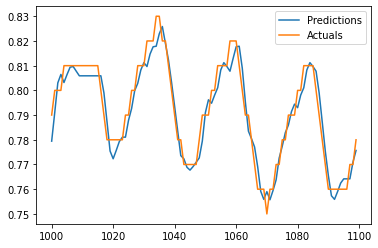

In [13]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1000:1100], label='Predictions')
plt.plot(train_results['Actuals'][1000:1100], label='Actuals')
plt.legend()

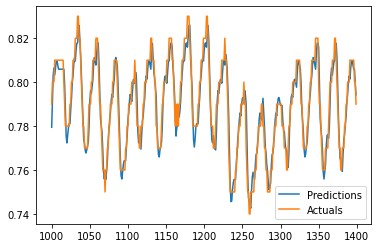

In [14]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1000:1400], label='Predictions')
plt.plot(train_results['Actuals'][1000:1400], label='Actuals')
plt.legend()

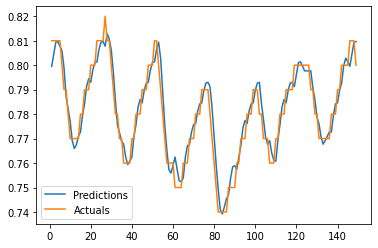

In [15]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1:150], label='Predictions')
plt.plot(train_results['Actuals'][1:150], label='Actuals')
plt.legend()

In [16]:
keras.metrics.mean_absolute_error(y_train1, train_predictions).numpy()

0.004591818

In [77]:
keras.metrics.mean_absolute_percentage_error(y_train1, train_predictions).numpy()

0.57951707

In [78]:
keras.metrics.mean_squared_error(y_train1, train_predictions).numpy()

3.256388e-05